# Nvidia Stock Forecasting with ML Models

# Install Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb



In [ ]:
df =pd.read_csv("/content/NVidia_stock_history.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6437,2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0
6438,2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0
6439,2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0
6440,2024-08-27 00:00:00-04:00,125.050003,129.199997,123.879997,128.300003,301726100,0.0,0.0
6441,2024-08-28 00:00:00-04:00,128.119995,128.330002,122.639999,125.175003,241795982,0.0,0.0


# EDA

In [ ]:
# Convert 'Date' to datetime, handling timezone information if present
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Extract only the date and format it as YYYY-MM-DD
df['Date'] = df['Date'].dt.date

print(df)

            Date        Open        High         Low       Close      Volume  \
0     1999-01-22    0.040129    0.044786    0.035590    0.037621  2714688000   
1     1999-01-25    0.040607    0.042039    0.037621    0.041562   510480000   
2     1999-01-26    0.042039    0.042876    0.037740    0.038337   343200000   
3     1999-01-27    0.038457    0.039412    0.036307    0.038218   244368000   
4     1999-01-28    0.038218    0.038457    0.037859    0.038098   227520000   
...          ...         ...         ...         ...         ...         ...   
6437  2024-08-22  130.020004  130.750000  123.099998  123.739998   376189100   
6438  2024-08-23  125.860001  129.600006  125.220001  129.369995   323230300   
6439  2024-08-26  129.570007  131.259995  124.370003  126.459999   331964700   
6440  2024-08-27  125.050003  129.199997  123.879997  128.300003   301726100   
6441  2024-08-28  128.119995  128.330002  122.639999  125.175003   241795982   

      Dividends  Stock Splits  
0      

In [ ]:
# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)


In [ ]:
start_date = '2023-07-01'
end_date = '2024-07-15'
df = df[(df.index >= start_date) & (df.index <= end_date)][['Close']]

In [ ]:
df= df[["Close"]]

In [ ]:
df.head()

,Close
Date,
2023-07-03,42.400303
2023-07-05,42.304337
2023-07-06,42.090401
2023-07-07,42.490276
2023-07-10,42.167374


In [ ]:
data =df.copy()

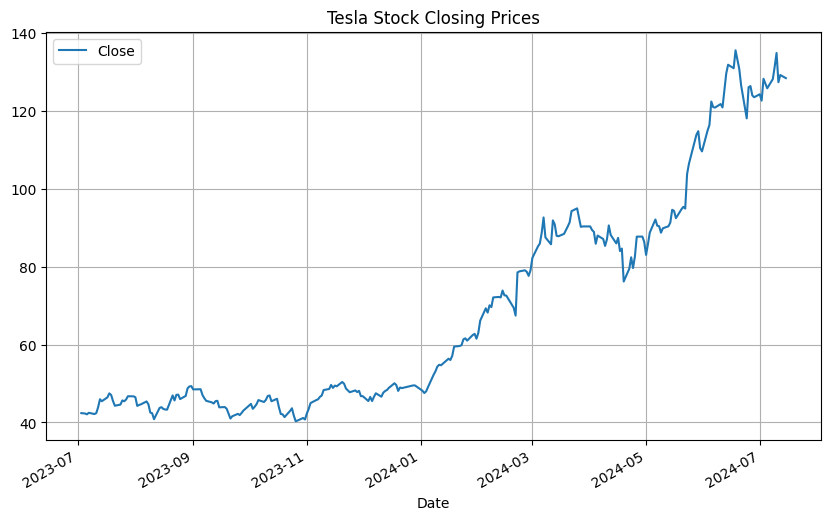

In [ ]:
# Plot the data
data.plot(figsize=(10, 6))
plt.title('Tesla Stock Closing Prices')
plt.grid(True)
plt.show()

# Train Test split

In [ ]:
# Train-test split (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Data Scaling

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
# Prepare the data for forecasting
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Set the time step
time_step = 5
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test = create_dataset(scaled_test_data, time_step)


In [ ]:
# Reshape for machine learning models
X_train = X_train.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Linear Regression

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 0.94


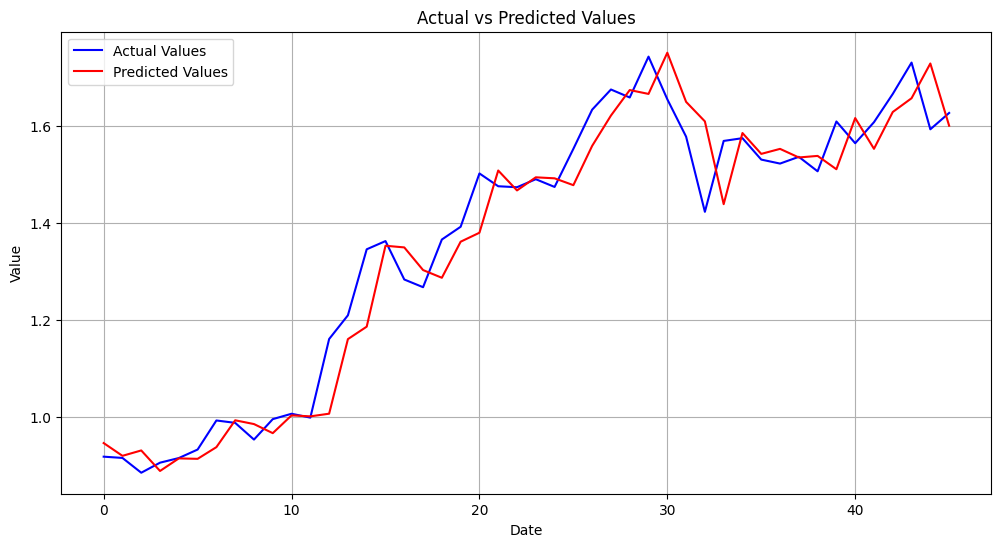

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Next 30 Days Forecasting

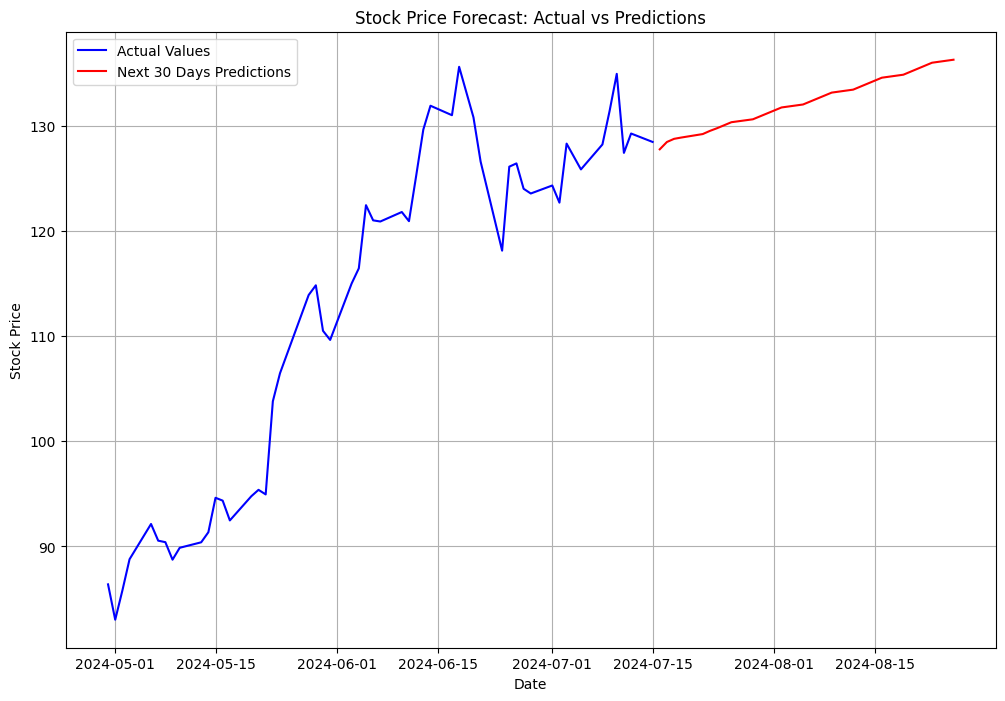

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

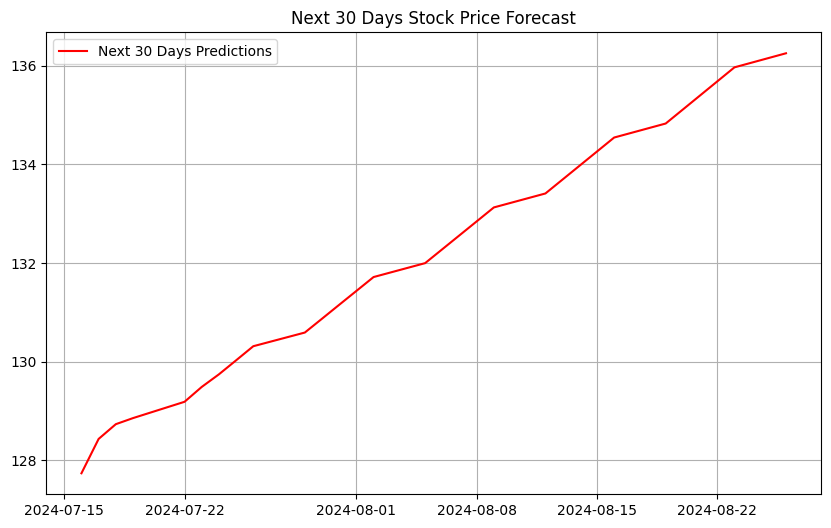

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting

In [ ]:
# Forecast next 90 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

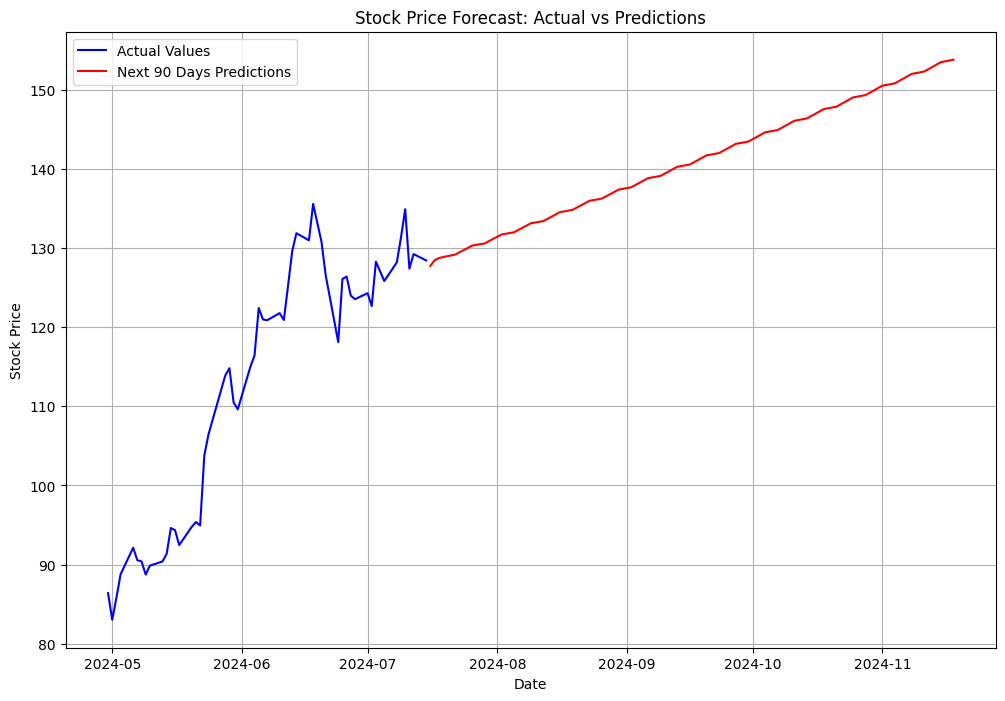

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

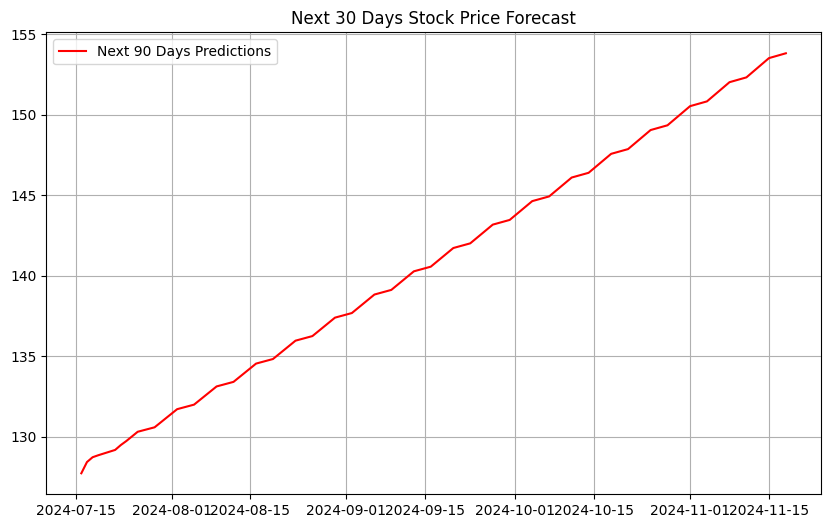

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Random Forest Regressor

In [ ]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.26
R-squared: -2.42


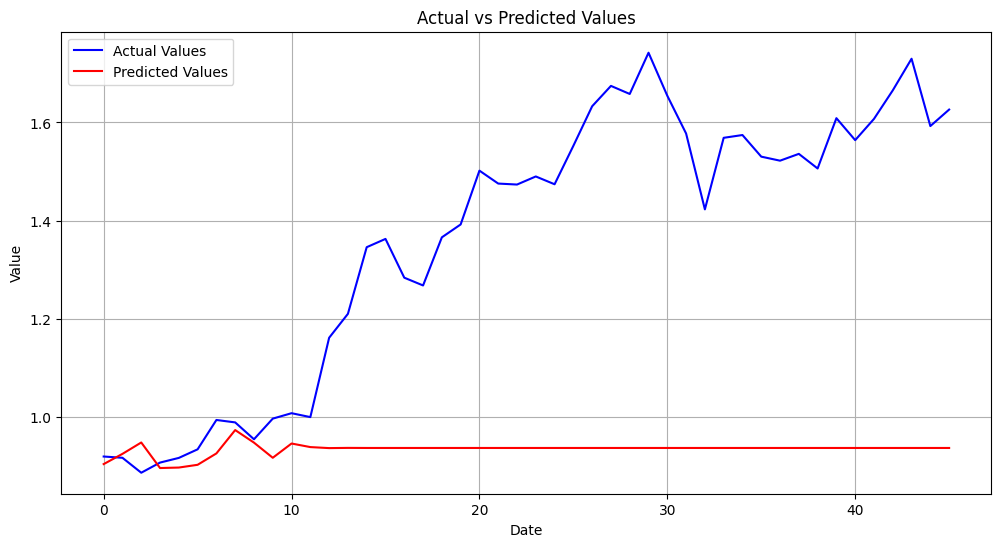

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Random Forest Regressor

In [ ]:

# Forecast next 30 days using the Random Forest  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

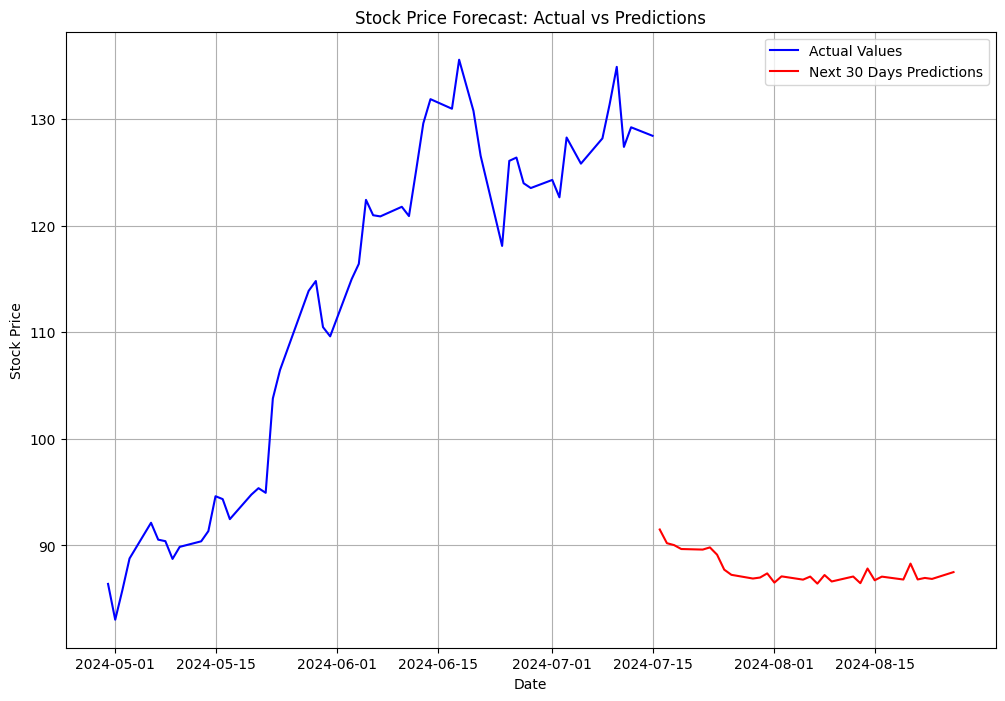

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

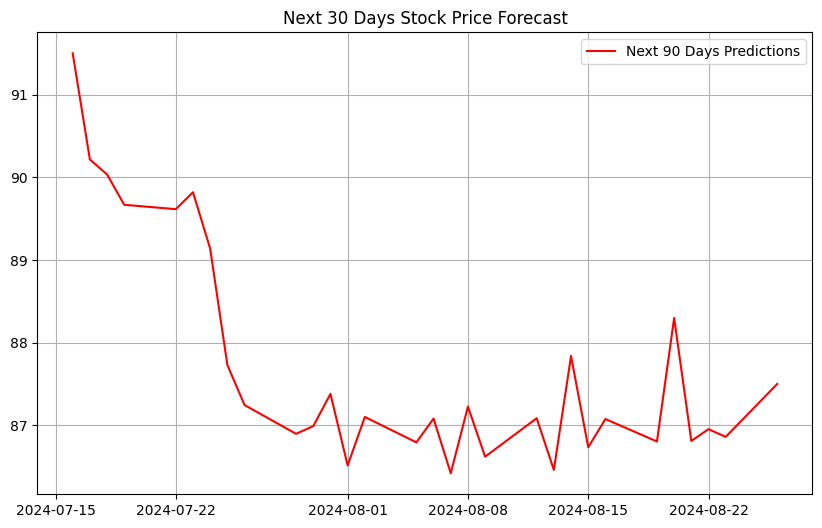

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting with Random Forest Regressor

In [ ]:
# Forecast next 30 days using the Random Forest Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

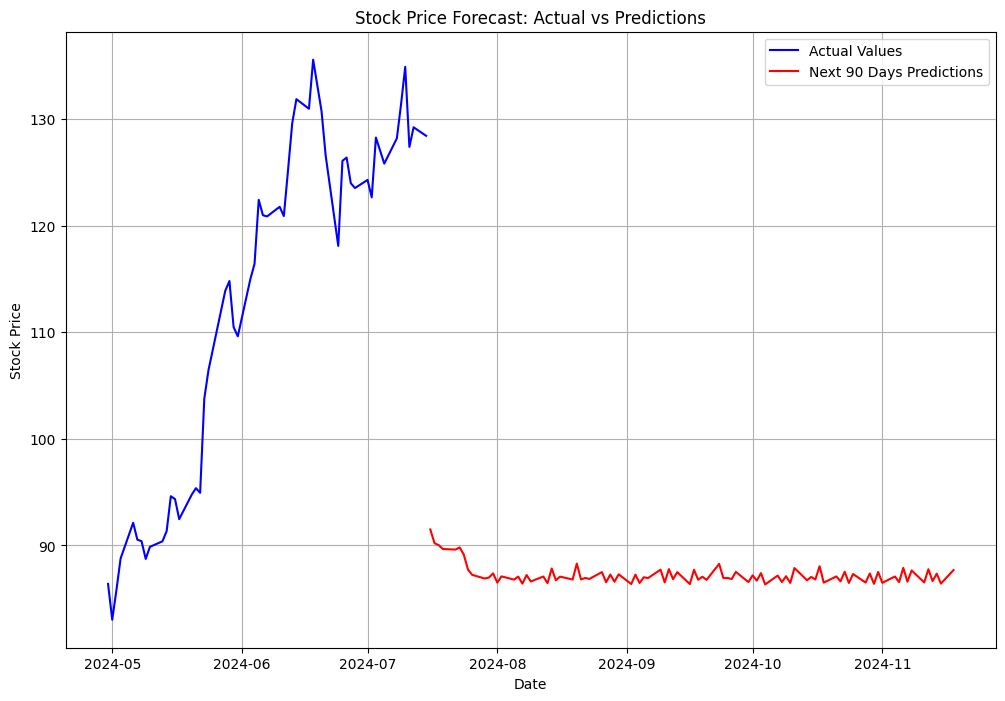

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

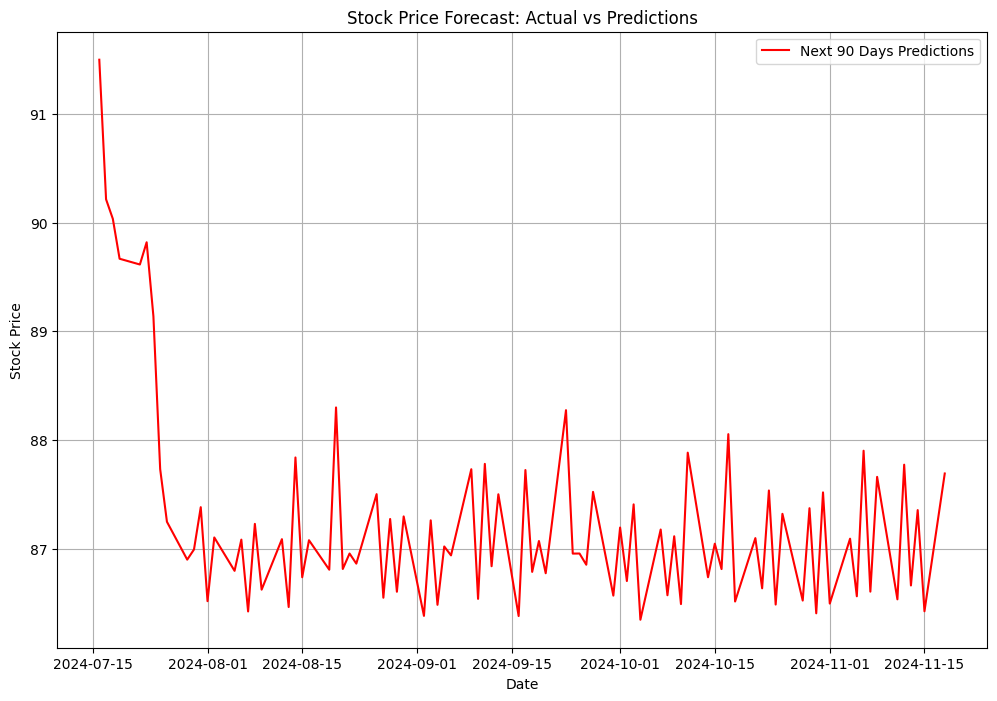

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Support Vector Regressor

In [ ]:
# 3. Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.69
R-squared: -8.09


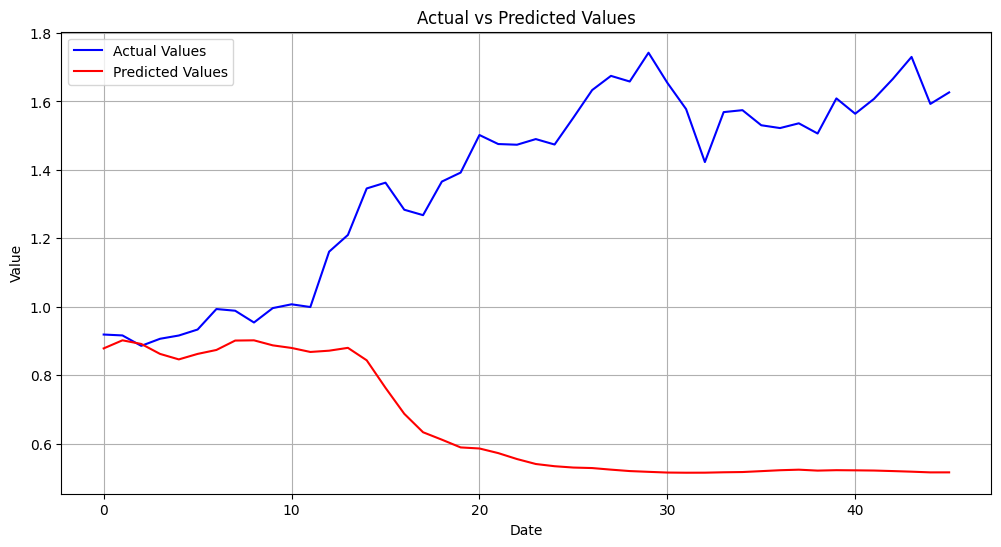

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Support Vector Regressor

In [ ]:
# Forecast next 30 days using the Support Vector  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

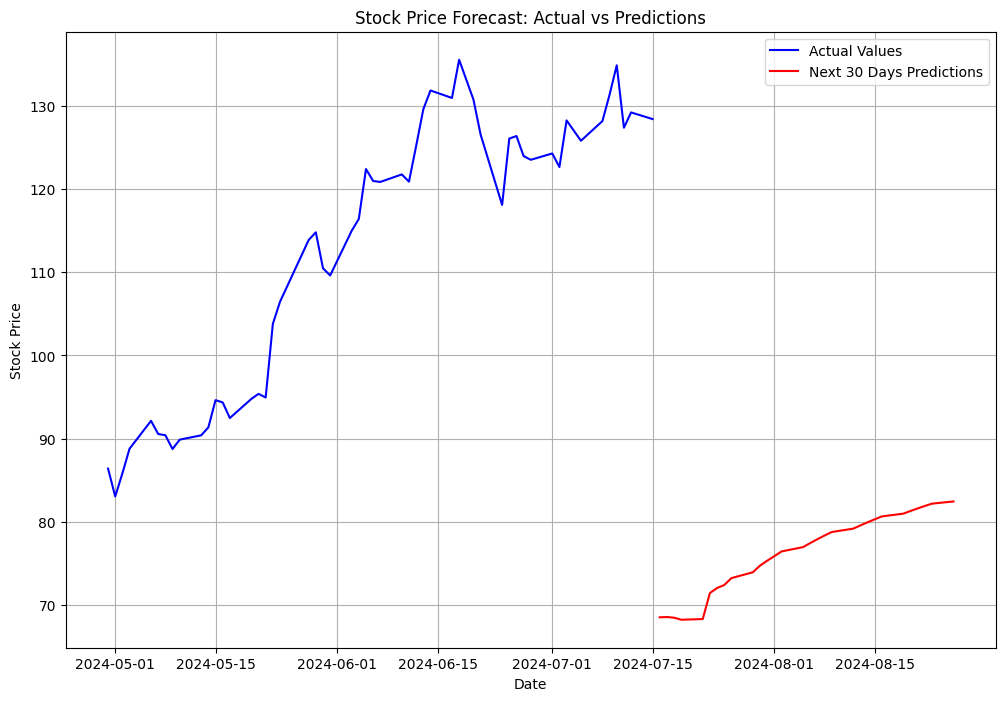

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

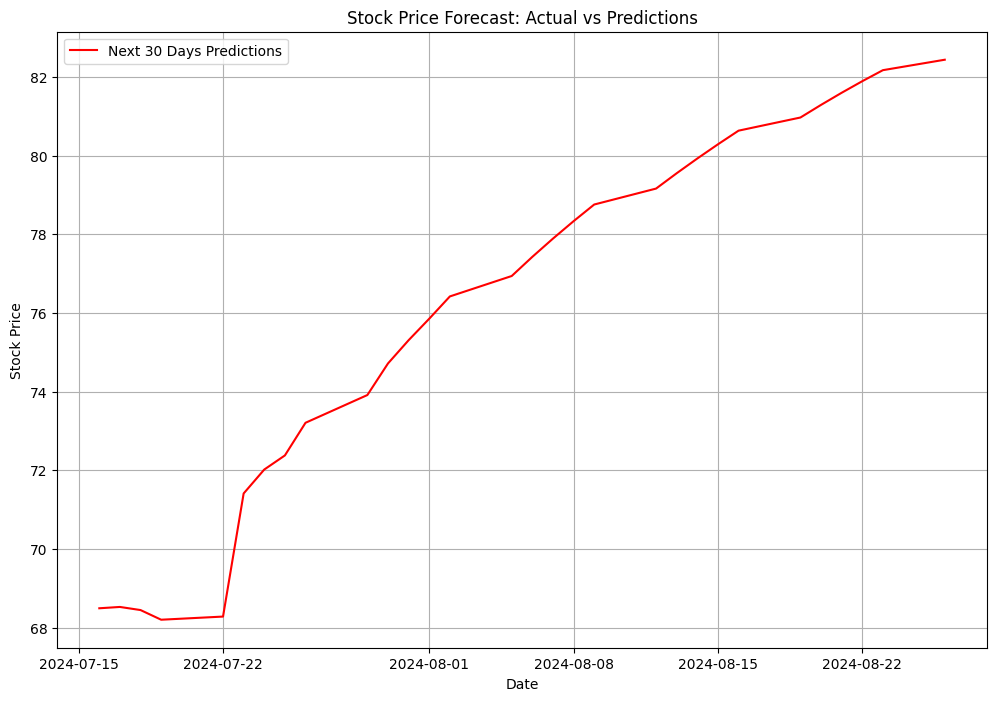

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with Support Vector Regressor

In [ ]:
# Forecast next 30 days using the Support Vector Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

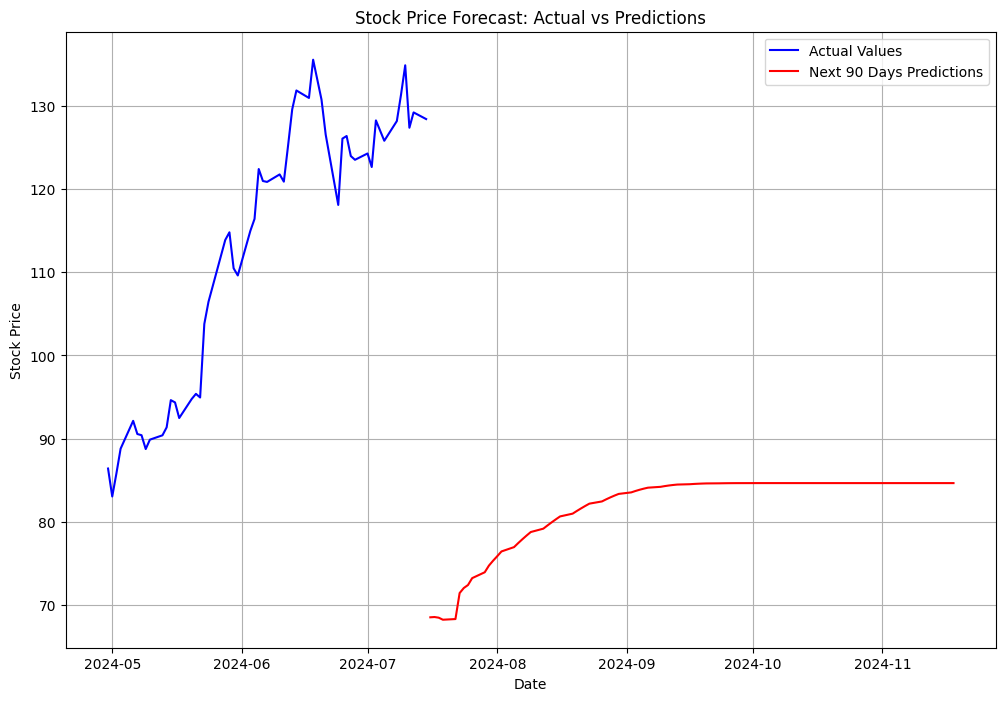

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

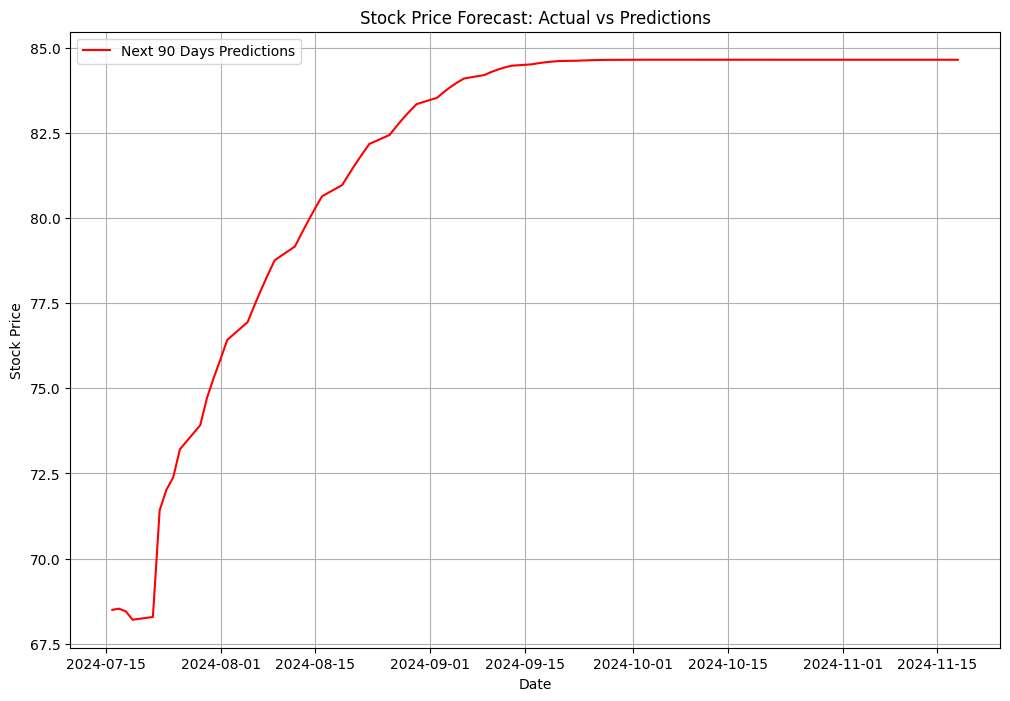

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# XGB Regressor

In [ ]:
# Initialize XGBRegressor
Xgb_model = xgb.XGBRegressor()

# Train the model
Xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = Xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.28
R-squared: -2.66


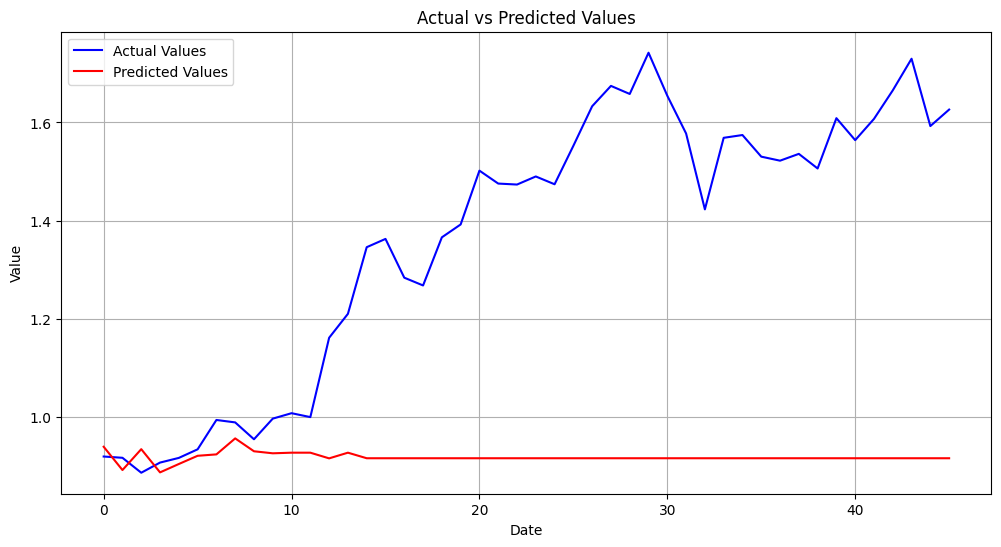

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with XGB Regressor

In [ ]:
# Forecast next 30 days using the XGB Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

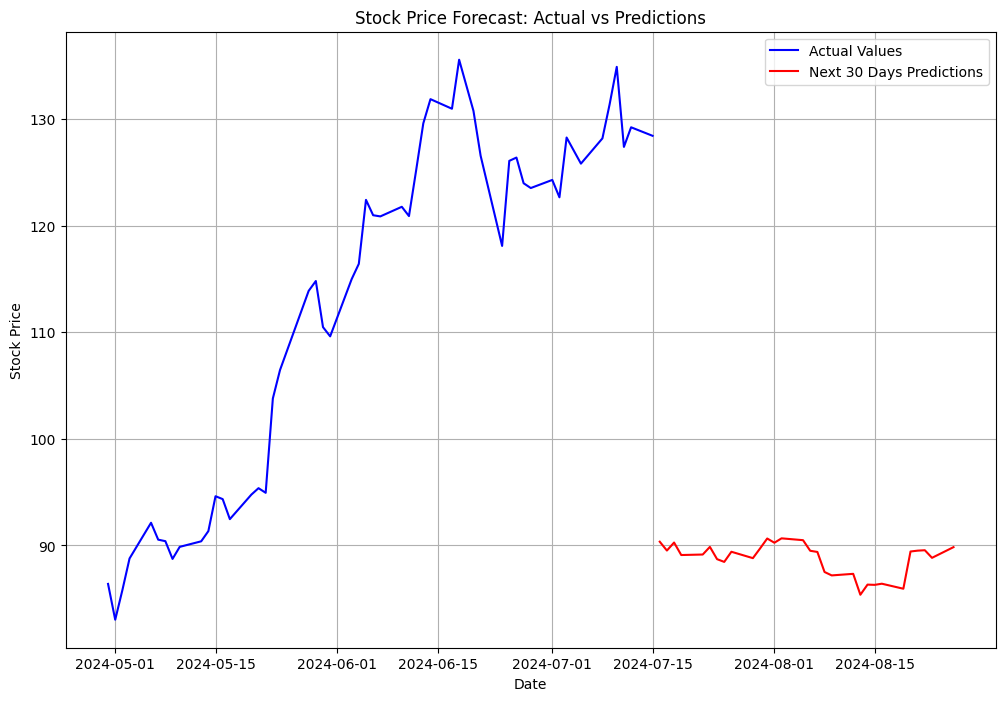

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

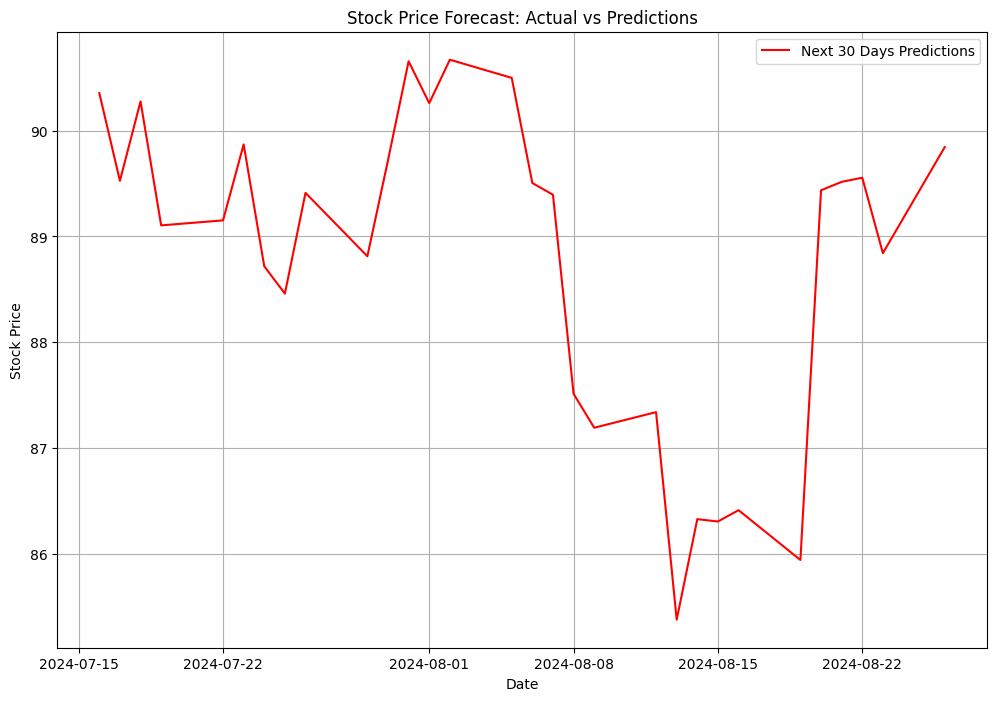

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with XGB Regressor

In [ ]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

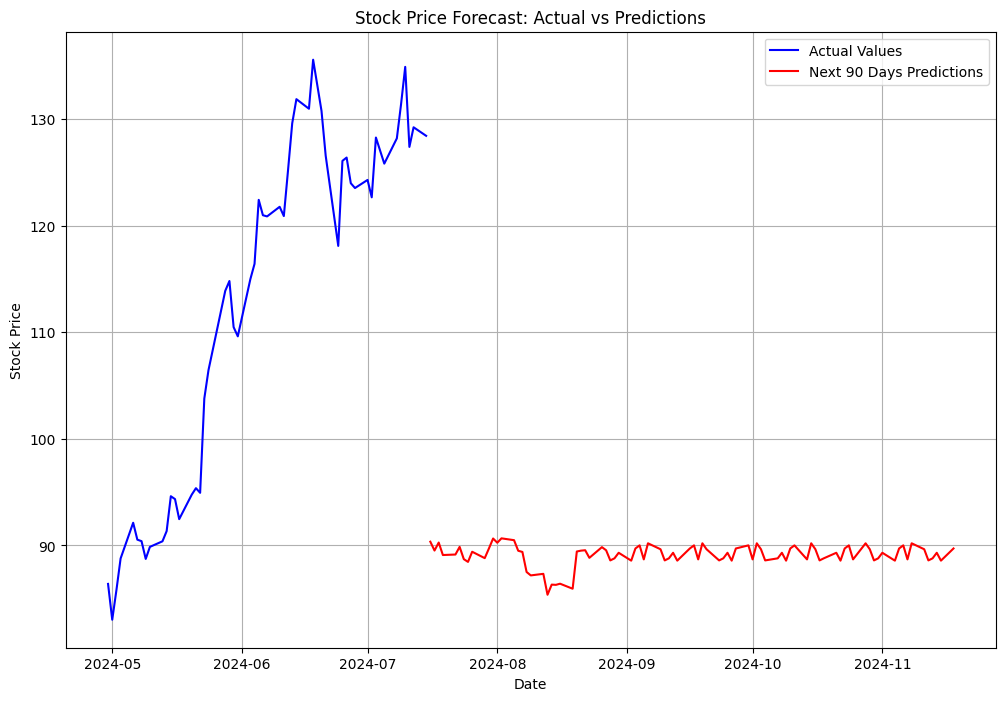

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

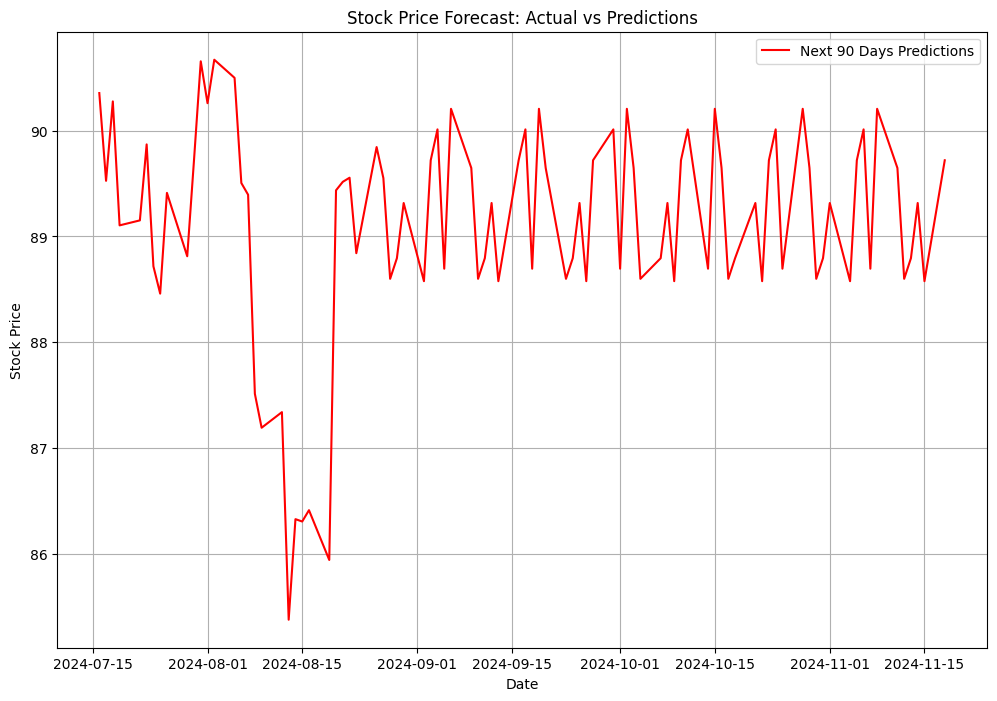

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()